In [28]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [29]:
dataDir='D:/datos/annotations_trainval2017'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [30]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.60s)
creating index...
index created!


In [31]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(';'.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(';'.join(nms)))

COCO categories: 
person;bicycle;car;motorcycle;airplane;bus;train;truck;boat;traffic light;fire hydrant;stop sign;parking meter;bench;bird;cat;dog;horse;sheep;cow;elephant;bear;zebra;giraffe;backpack;umbrella;handbag;tie;suitcase;frisbee;skis;snowboard;sports ball;kite;baseball bat;baseball glove;skateboard;surfboard;tennis racket;bottle;wine glass;cup;fork;knife;spoon;bowl;banana;apple;sandwich;orange;broccoli;carrot;hot dog;pizza;donut;cake;chair;couch;potted plant;bed;dining table;toilet;tv;laptop;mouse;remote;keyboard;cell phone;microwave;oven;toaster;sink;refrigerator;book;clock;vase;scissors;teddy bear;hair drier;toothbrush

COCO supercategories: 
kitchen;sports;person;animal;furniture;accessory;indoor;appliance;outdoor;vehicle;electronic;food


In [63]:
catIds = coco.getCatIds(catNms=['person','dog']);
imgIds = coco.getImgIds(catIds=catIds );


In [64]:

from random import sample 
imgIDselected=sample(imgIds,1)[0]

In [65]:
imgIds = coco.getImgIds(imgIds = [imgIDselected])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

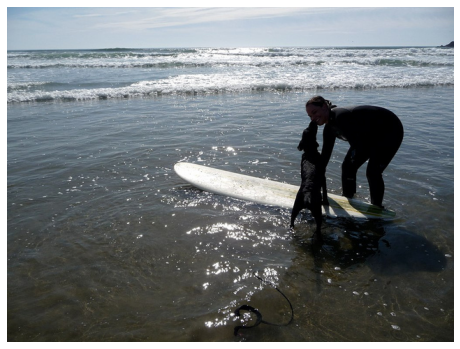

In [66]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

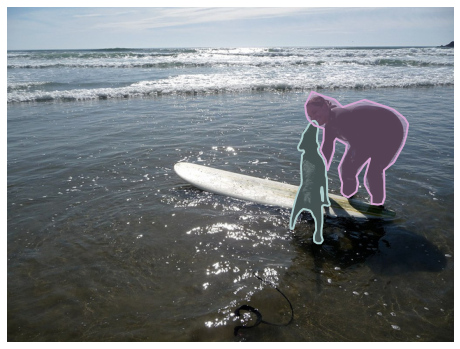

In [67]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [68]:
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.22s)
creating index...
index created!


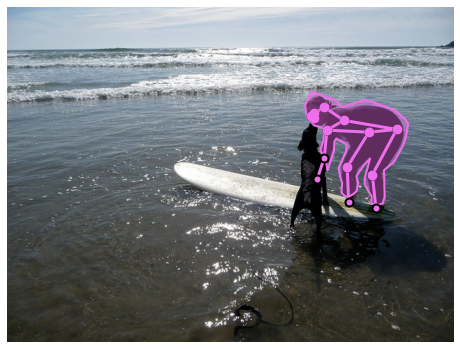

In [69]:
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [70]:
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


A person on a surfboard in the water.
Person prepares surfboard while dog stands on it with face in person's
A woman that is next to a surfboard with a dog.
Woman with surfboard getting kisses from dog at waters edge.
A woman bending over to kiss a dog on a surfboard.


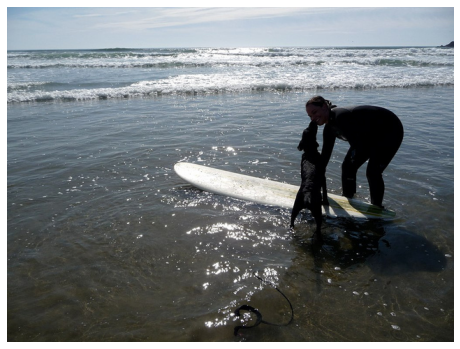

In [71]:
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()